# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [51]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [52]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [53]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.sum((X @ w - y)**2) / len(X)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return 2*X.transpose() @ (X @ w - y) / len(X)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [54]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [55]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trace = [w_init]

    for i in range(n_iterations):
        w_init = w_init - lr * loss.calc_grad(X, y, w_init)
        trace.append(w_init)

    return trace


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [56]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [57]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [58]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr = 0.0001


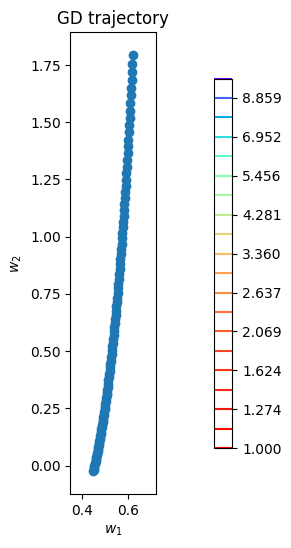

lr = 0.0005


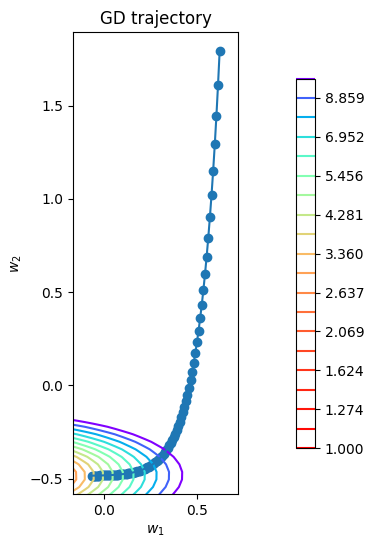

lr = 0.001


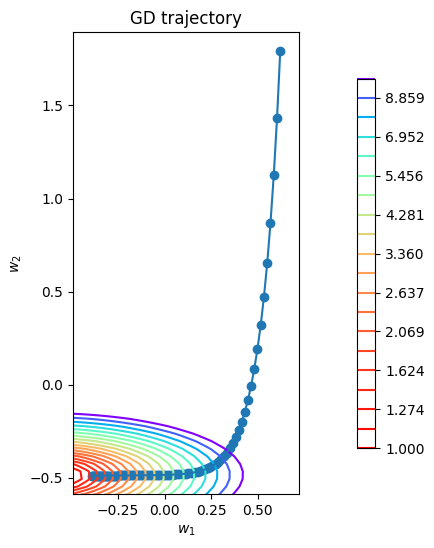

lr = 0.005


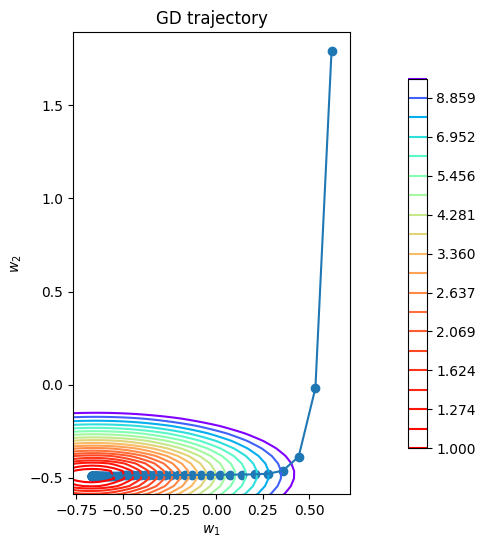

lr = 0.01


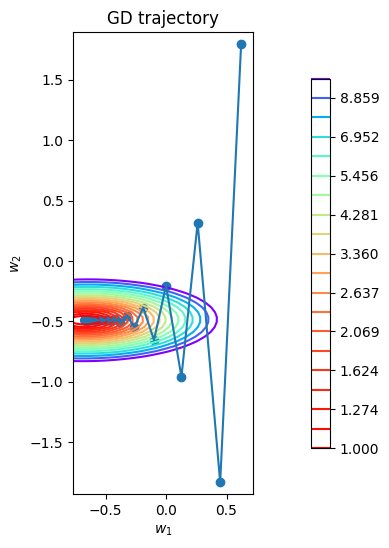

lr = 0.05


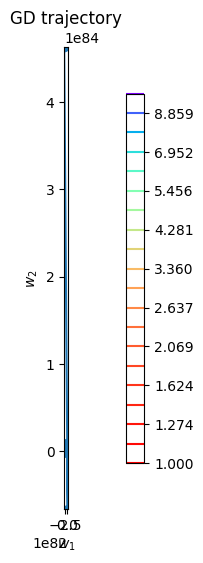

lr = 0.1


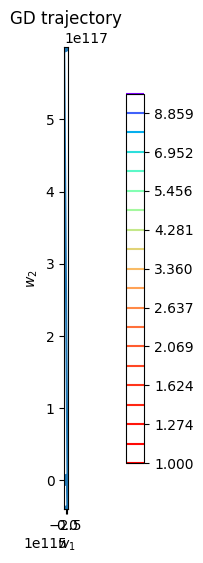

In [59]:
lr_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

for lr in lr_list:
  print(f'lr = {lr}')
  plot_gd(gradient_descent(w_init, X, y, loss, lr, 100), X, y, loss)


При маленьком шаге градиентный спуск не успел достичь минимума, при большом - наоборот перескочил. Для данного кол-ва шагов идеальный вариант - 0.005 или 0.01, а лучше - что-то между)

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [60]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trace = [w_init]

    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      w_init = w_init - lr * loss.calc_grad(X[batch_indices], y[batch_indices], w_init)
      trace.append(w_init)

    return trace

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.001, batch = 10


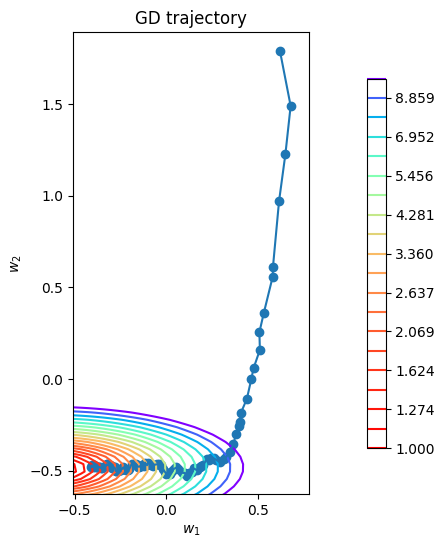

lr = 0.001, batch = 25


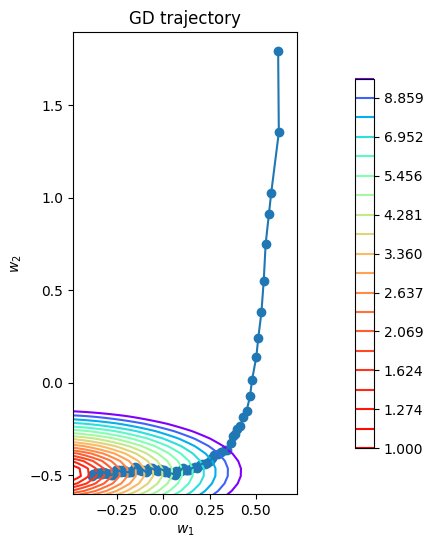

lr = 0.001, batch = 50


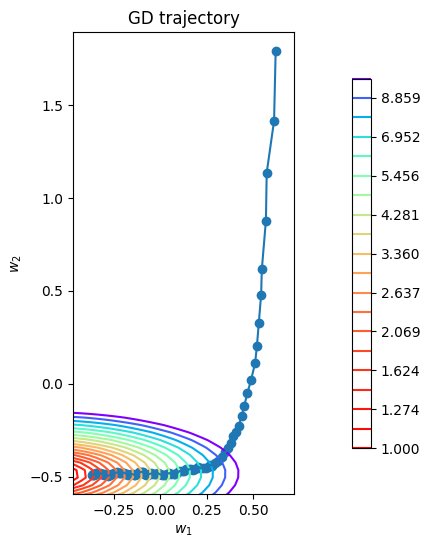

lr = 0.001, batch = 100


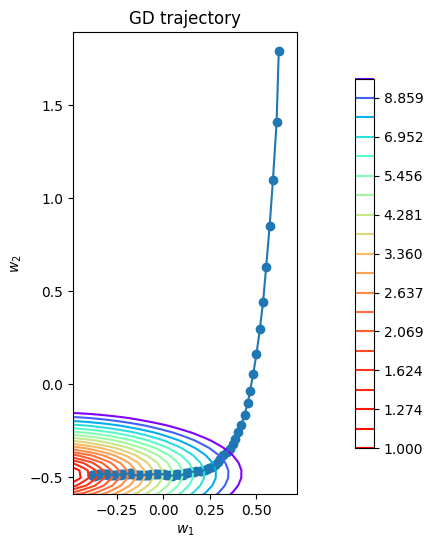

lr = 0.0025, batch = 10


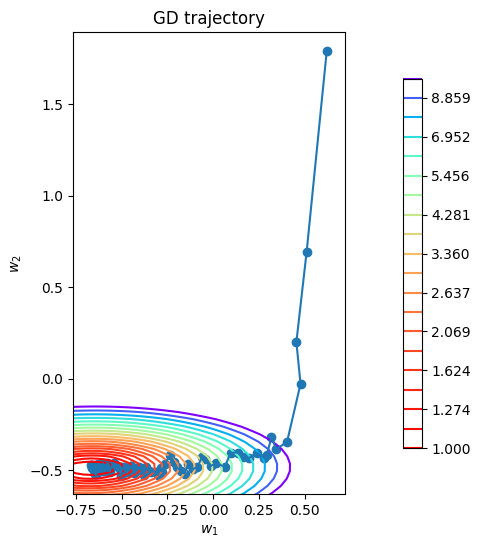

lr = 0.0025, batch = 25


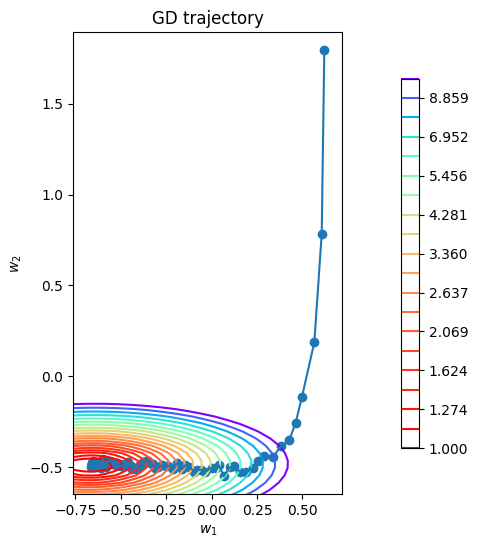

lr = 0.0025, batch = 50


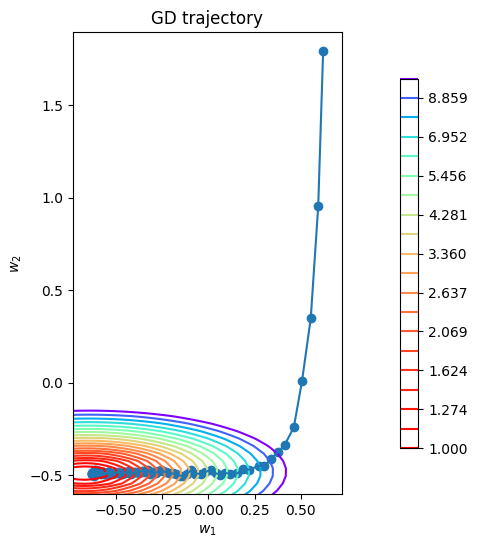

lr = 0.0025, batch = 100


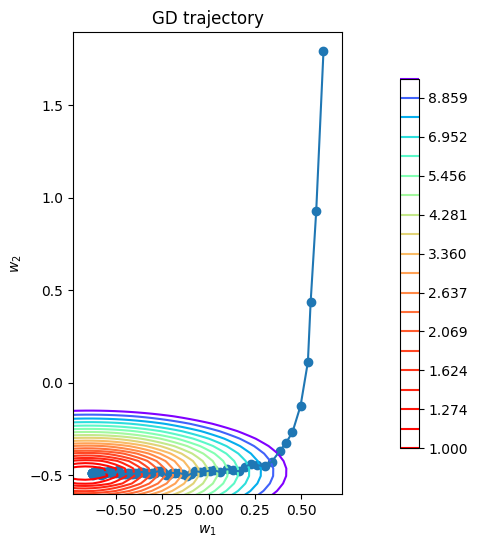

lr = 0.005, batch = 10


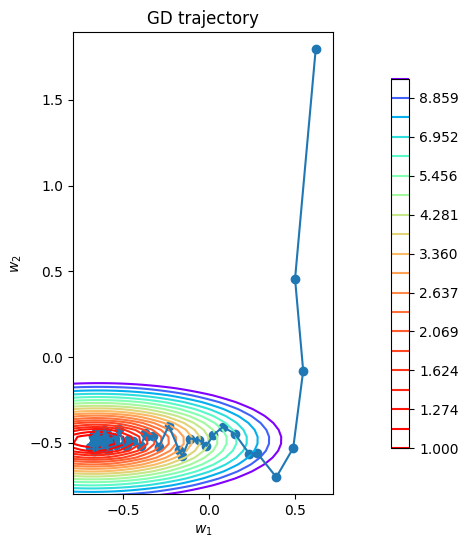

lr = 0.005, batch = 25


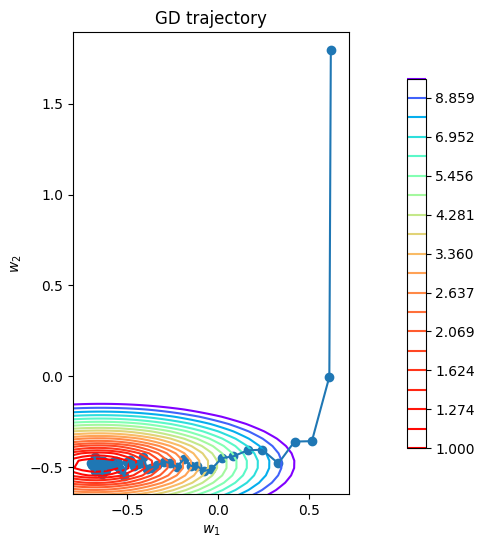

lr = 0.005, batch = 50


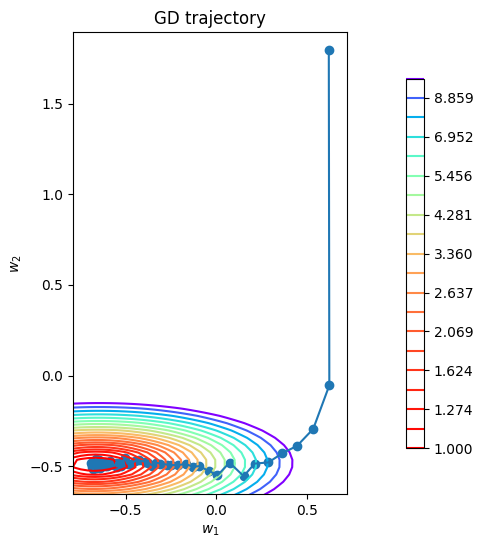

lr = 0.005, batch = 100


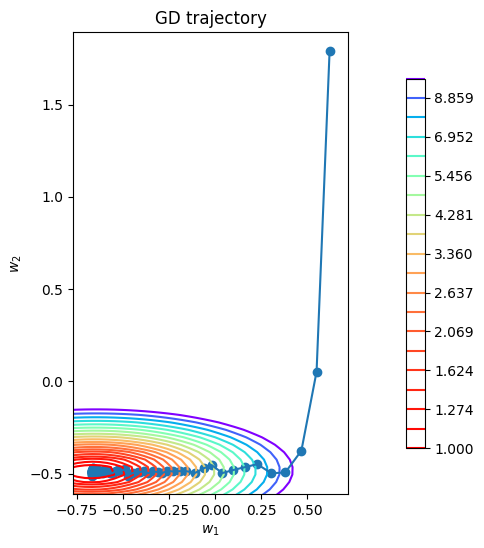

lr = 0.0075, batch = 10


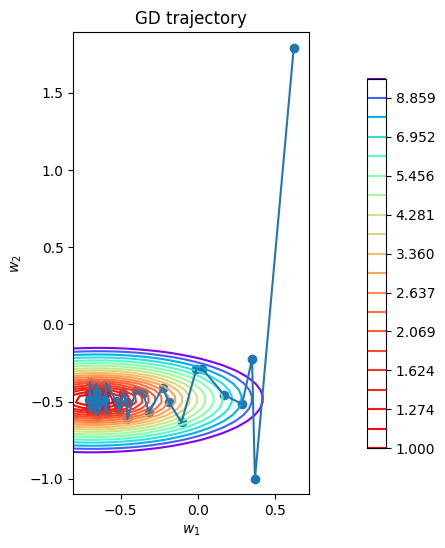

lr = 0.0075, batch = 25


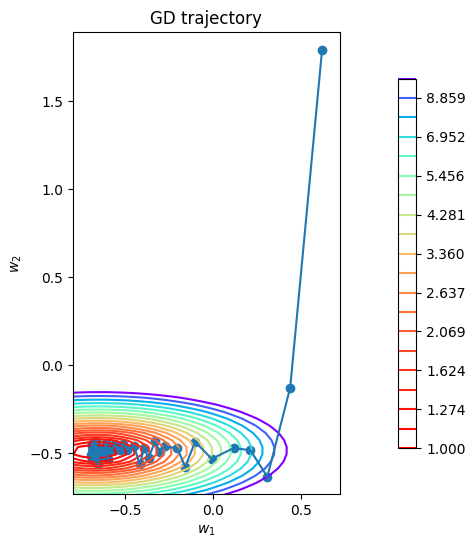

lr = 0.0075, batch = 50


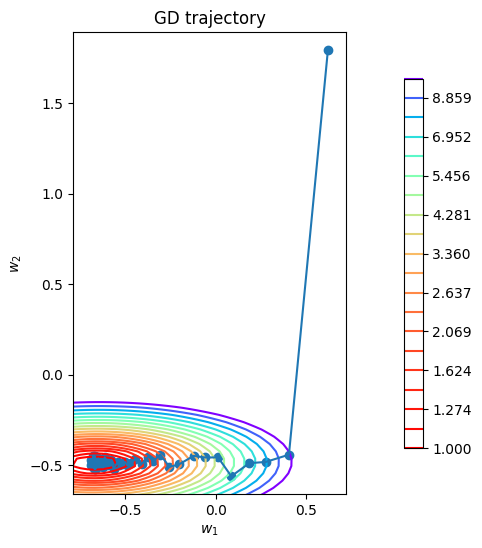

lr = 0.0075, batch = 100


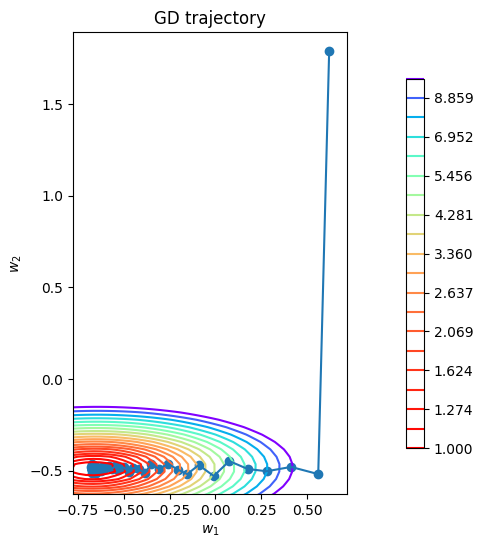

lr = 0.01, batch = 10


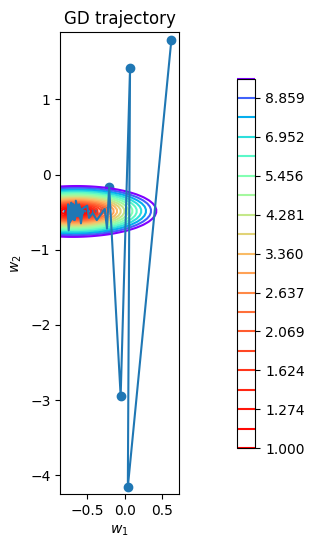

lr = 0.01, batch = 25


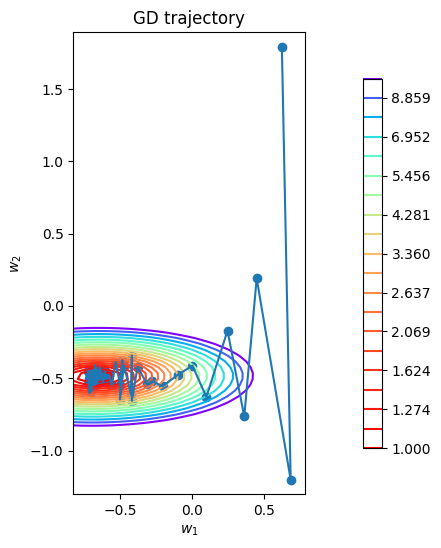

lr = 0.01, batch = 50


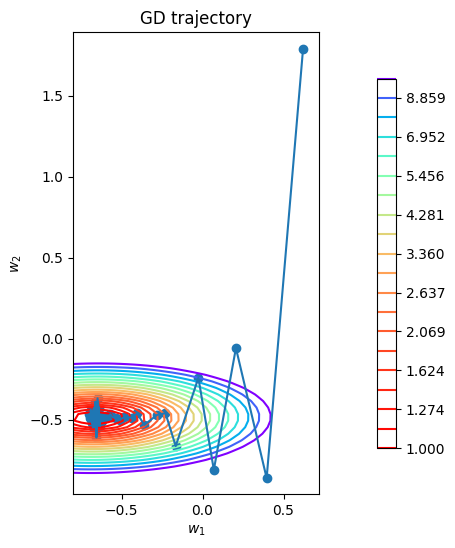

lr = 0.01, batch = 100


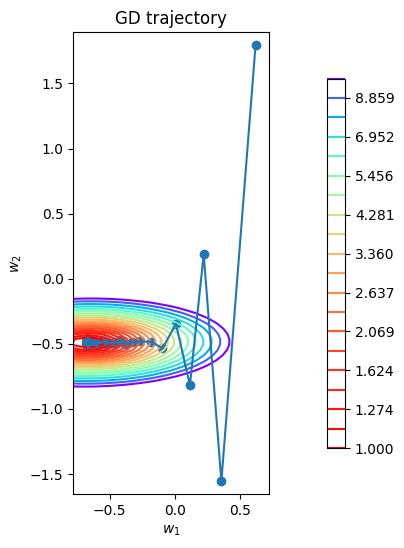

In [61]:
lr_list = [0.001, 0.0025, 0.005, 0.0075, 0.01]
batch_list = [10, 25, 50, 100]

for lr in lr_list:
  for batch in batch_list:
    print(f'lr = {lr}, batch = {batch}')
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch, 100), X, y, loss)

При небольшом размере батча больше скачки между шагами градиентного спуска, что в целом логично, так как выборка меньше и разброс больше. При средних же значениях стохастический градиентный спуск близок к обычному, но работает быстрее

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [62]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trace = [w_init]

    for i in range(n_iterations):
      lr_cur = lr*(1 / (1 + i)) ** p
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      w_init = w_init - lr_cur * loss.calc_grad(X[batch_indices], y[batch_indices], w_init)
      trace.append(w_init)

    return trace

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


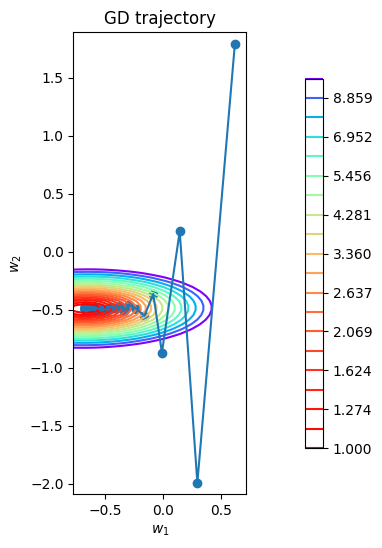

p = 0.3


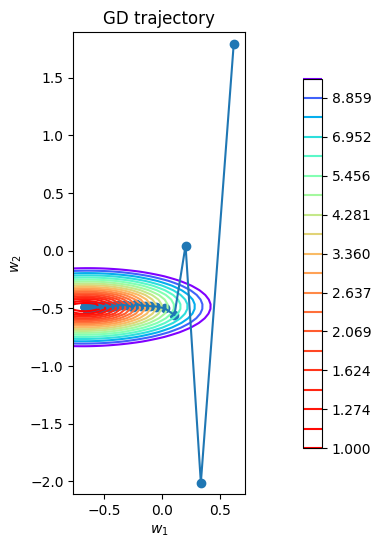

p = 0.5


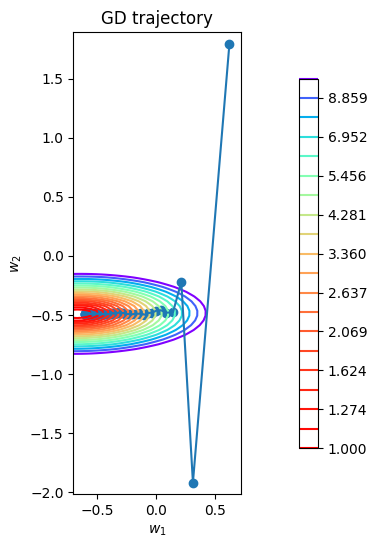

p = 0.6


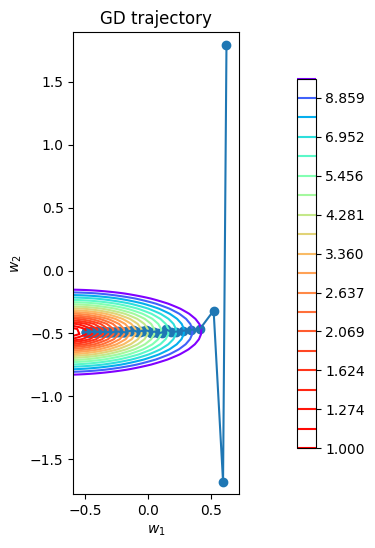

p = 0.8


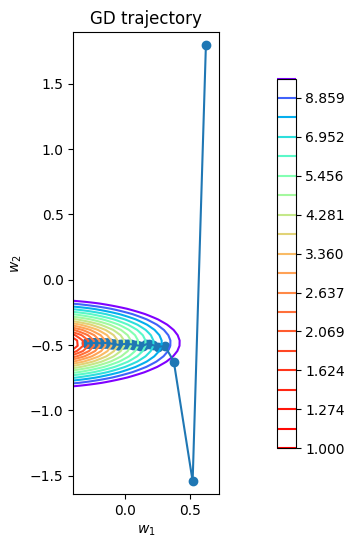

p = 1


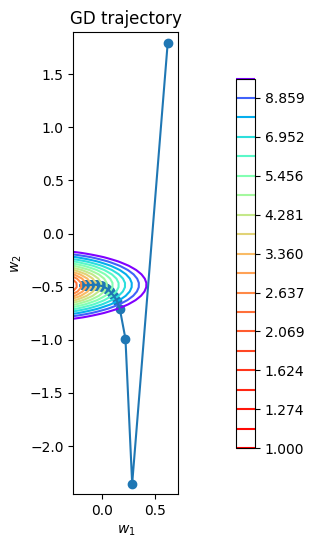

In [63]:
lr = 0.01
batch_size = 10
p_list = [0.1, 0.3, 0.5, 0.6, 0.8, 1]

for p in p_list:
  print(f'p = {p}')
  plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch, p, 100), X, y, loss)

При больших р градиентный спуск не достиг минимума, потому что при бОльших р длина шага меньше и её просто не хватает, чтобы дойти до нужной области. В нашем случае лучше брать не больше 0.6, в этом случае скорость достижения минимума увеличивается

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

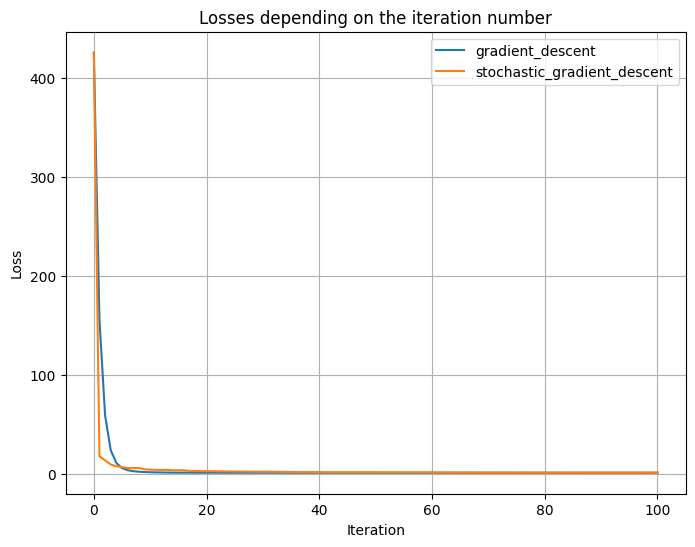

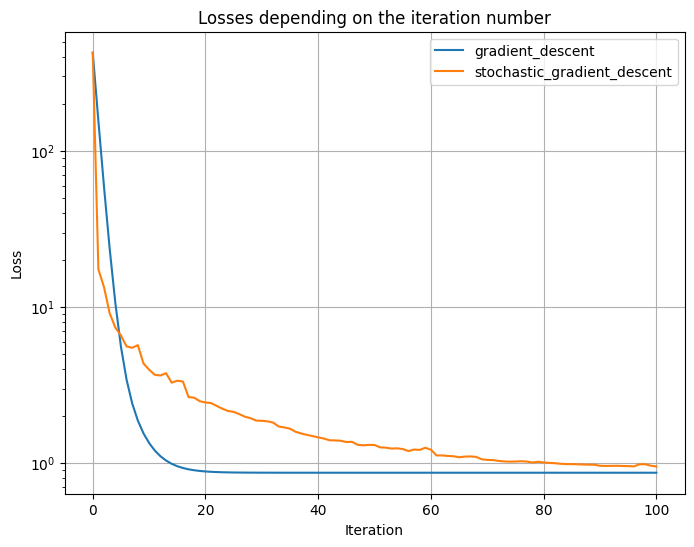

In [64]:
loss_GD = []
loss_SGD = []
w_GD = gradient_descent(w_init, X, y, loss, 0.01, 100)
w_SGD = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.5, 100)
for w in w_GD:
    loss_GD.append(loss.calc_loss(X, y, w))
for w in w_SGD:
    loss_SGD.append(loss.calc_loss(X, y, w))

x = range(101)
plt.figure(figsize=(8, 6))
plt.title('Losses depending on the iteration number')

plt.plot(x, loss_GD, label= 'gradient_descent')
plt.plot(x, loss_SGD, label = 'stochastic_gradient_descent')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()

plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.title('Losses depending on the iteration number')

plt.plot(x, loss_GD, label= 'gradient_descent')
plt.plot(x, loss_SGD, label = 'stochastic_gradient_descent')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()

plt.grid()
plt.yscale('log')
plt.show()

Отличия небольшие, стохастический градиентный спуск лучше на начальных итерациях, затем они меняются и выравниваются. Различие было бы, если бы мы взяли размер батча побольше и уменьшили кол-во итераций у стохастического, либо поменяли бы размер шага

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [65]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.05) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        np.random.seed(10)
        self.w = np.random.sample(X.shape[1]) * 2 - 1
        self.w = gradient_descent(self.w, X, y, self.loss, self.lr, 100)[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w


Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [66]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [67]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [68]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw.columns = X_raw.columns.astype(str)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [69]:
X_raw.isna().sum()

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

In [70]:
X_raw.dtypes

index      int64
0          int64
1        float64
2         object
3         object
4         object
5         object
6         object
7         object
8         object
9        float64
10       float64
11       float64
12       float64
13         int64
14        object
15        object
16         int64
17        object
18       float64
19       float64
20       float64
21       float64
22       float64
23         int64
24         int64
dtype: object

In [71]:
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [72]:
X_raw.drop(columns='index', inplace=True)

# для численных переменных признаков заполним пропуски средними
X_num = X_raw[X_raw.columns[~(X_raw.dtypes == "object").values]]
X_num = X_num.fillna(X_num.mean())

# для категориальных переменных признаков заполним пропуски часто встречающимся
X_cat = X_raw[X_raw.columns[(X_raw.dtypes == "object").values]]
X_cat = X_cat.fillna(X_cat.mode().iloc[0])

X_raw = pd.concat([X_num, X_cat], axis=1)

X_raw.isna().sum().sum()

0

In [73]:
from sklearn.preprocessing import OneHotEncoder

X_raw = pd.get_dummies(X_raw)
X_raw.head()

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y,
                                                    train_size=0.3,
                                                    random_state=10)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-1.574249,0.131829,1.031888,1.217689,0.345368,0.104121,1.241954,0.824378,-0.267214,0.409929,...,0.0,-0.130189,-0.267261,-0.788430,-0.130189,-0.301511,-0.130189,1.183216,-0.130189,0.0
1,1.739960,0.977988,-0.399825,0.010200,0.251177,-1.467774,0.586942,0.704788,0.929615,2.282763,...,0.0,-0.130189,-0.267261,-0.788430,-0.130189,-0.301511,7.681146,-0.845154,-0.130189,0.0
2,0.911407,-1.302962,-0.766078,-1.255181,-1.020407,-0.057099,-0.744273,-0.443283,1.002150,-2.007729,...,0.0,-0.130189,-0.267261,1.268344,-0.130189,-0.301511,-0.130189,-0.845154,-0.130189,0.0
3,-0.745697,-1.008645,-0.433121,-0.560462,-0.643641,-0.339234,-0.819407,-0.682464,-0.557354,-0.679720,...,0.0,-0.130189,-0.267261,1.268344,-0.130189,-0.301511,-0.130189,-0.845154,-0.130189,0.0
4,0.911407,-0.898277,-0.166756,-0.113857,-0.125589,0.749001,-0.567035,-0.419365,-0.557354,0.580187,...,0.0,-0.130189,-0.267261,-0.788430,-0.130189,-0.301511,-0.130189,1.183216,-0.130189,0.0
5,0.082855,0.131829,2.280476,2.160522,2.935632,0.628086,2.328503,4.244672,1.654966,0.409929,...,0.0,-0.130189,-0.267261,-0.788430,-0.130189,-0.301511,-0.130189,1.183216,-0.130189,0.0
6,0.082855,1.309093,-0.766078,-0.477757,-0.926215,-1.225944,-0.996645,-0.873809,-1.355240,0.001311,...,0.0,-0.130189,-0.267261,1.268344,-0.130189,-0.301511,-0.130189,-0.845154,-0.130189,0.0
7,0.911407,0.573303,0.016370,0.258314,-0.078493,-0.742284,0.332643,0.465606,1.002150,0.920702,...,0.0,-0.130189,-0.267261,-0.788430,-0.130189,-0.301511,-0.130189,1.183216,-0.130189,0.0
8,-1.574249,-0.861487,1.797689,1.300393,1.475665,0.668391,0.974169,1.111396,0.857080,-1.224544,...,0.0,-0.130189,-0.267261,-0.788430,-0.130189,-0.301511,-0.130189,1.183216,-0.130189,0.0
9,-0.745697,-0.603961,-0.183404,-0.089045,-0.172684,-0.540759,-0.696111,-0.443283,1.002150,-2.007729,...,0.0,-0.130189,-0.267261,1.268344,-0.130189,-0.301511,-0.130189,-0.845154,-0.130189,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [76]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [77]:
from sklearn.metrics import mean_squared_error

predict_train = linear_regression.predict(X_train)
predict_test = linear_regression.predict(X_test)
mse_train_0 = mean_squared_error(y_train, predict_train)
mse_test_0 = mean_squared_error(y_test, predict_test)
print('MSE train:', mse_train_0)
print('MSE test:', mse_test_0)

MSE train: 1505722.481127777
MSE test: 8089640.278776287


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [78]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        loss = MSELoss()

        return loss.calc_loss(X, y, w) + self.coef * np.sum(w[0:-1] ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        loss = MSELoss()
        w[-1] = 0

        return loss.calc_grad(X, y, w) + 2 * self.coef * w

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [79]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [80]:
linear_regression = LinearRegression(MSEL2Loss(0.1), lr=0.07)
linear_regression.fit(X_train, y_train)
predic_test = linear_regression.predict(X_test)
predic_train = linear_regression.predict(X_train)

mse_train_1 = mean_squared_error(y_train, predic_train)
mse_test_1 = mean_squared_error(y_test, predic_test)
print(f'MSE train = {mse_train_0}')
print(f'MSE REG train = {mse_train_1}')
print(f'MSE test = {mse_test_0}')
print(f'MSE REG test = {mse_test_1}')


MSE train = 1505722.481127777
MSE REG train = 138534082.35828277
MSE test = 8089640.278776287
MSE REG test = 137651159.0892482


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [81]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def phi(self, z):
        # Используем np.where для векторизованного условия
        return np.where(np.abs(z) <= self.eps, 0.5 * z**2, self.eps * (np.abs(z) - 0.5 * self.eps))

    def phi2(self, z):
        # Используем np.where для векторизованного условия
        return np.where(np.abs(z) <= self.eps, z, self.eps * np.sign(z))

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        # return np.sum(map(self.phi, X @ w - y))/len(X)
        z = np.dot(X, w) - y
        loss = np.mean(self.phi(z))
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        # print(np.array(list(map(self.phi2, X @ w - y))))
        # return np.sum(X* np.array(list(map(self.phi2, X @ w - y))))/len(X)
        z = np.dot(X, w) - y
        grad = np.dot(X.T, self.phi2(z)) / X.shape[0]
        return grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [82]:
linear_regression = LinearRegression(HuberLoss(3500), lr=0.05)
linear_regression.fit(X_train, y_train)
predic_test = linear_regression.predict(X_test)
predic_train = linear_regression.predict(X_train)

mse_train_2 = mean_squared_error(y_train, predic_train)
mse_test_2 = mean_squared_error(y_test, predic_test)
print(f'MSE Huber train = {mse_train_1}')
print(f'MSE REG train = {mse_train_2}')
print(f'MSE Huber test = {mse_test_1}')
print(f'MSE REG test = {mse_test_2}')


MSE Huber train = 138534082.35828277
MSE REG train = 9065679.588642566
MSE Huber test = 137651159.0892482
MSE REG test = 6629429.713484994


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

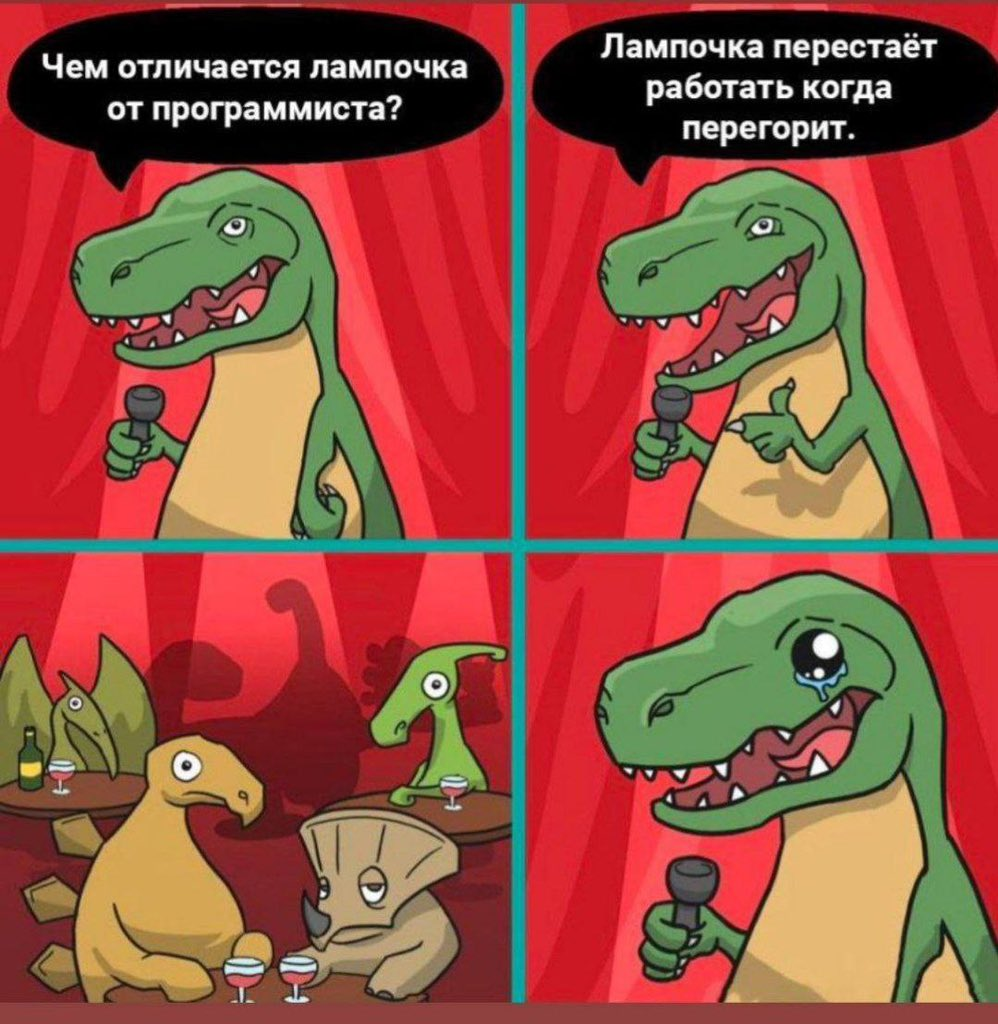

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [83]:
import numpy as np

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def simulated_annealing(X, y, initial_w, T=1.0, T_min=0.00001, alpha=0.9, max_iter=1000):
    w = initial_w
    T_current = T
    best_w = w
    best_mse = mse(y, np.dot(X, w))
    trace = [w_init]

    for i in range(max_iter):
        w_new = w + np.random.standard_t(3, size=w.shape)
        mse_new = mse(y, np.dot(X, w_new))

        if mse_new < best_mse:
            best_w = w_new
            best_mse = mse_new

        if mse_new < mse(y, np.dot(X, w)):
            w = w_new
        else:
            if np.random.rand() < np.exp((mse(y, np.dot(X, w)) - mse_new) / T_current):
                w = w_new

        T_current *= alpha
        if T_current < T_min:
            T_current = T_min
        trace.append(w)

    return trace, best_mse

# Пример использования
# X - матрица признаков, y - вектор целевых значений
# initial_w - начальные веса
# T, T_min, alpha, max_iter - параметры алгоритма

# Предположим, что у вас есть набор данных X и целевые значения y
# X = ...
# y = ...

# Определение начальных весов
num_features = X.shape[1] # Количество признаков в наборе данных
initial_w = np.zeros(num_features) # Инициализация нулевым вектором

# Вызов функции с определенными начальными весами
best_w, best_mse = simulated_annealing(X, y, initial_w, T=1.0, T_min=0.00001, alpha=0.9, max_iter=1000)


MSE = 0.8670644395649493


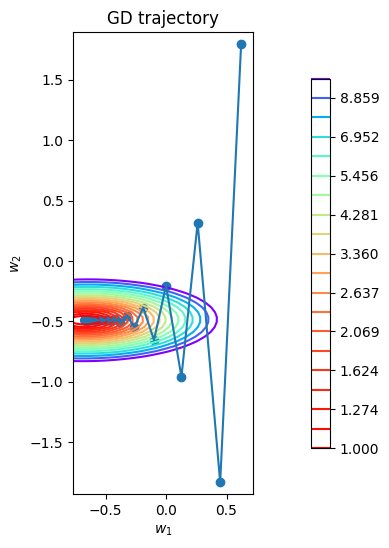

MSE = 1.0147727672228557


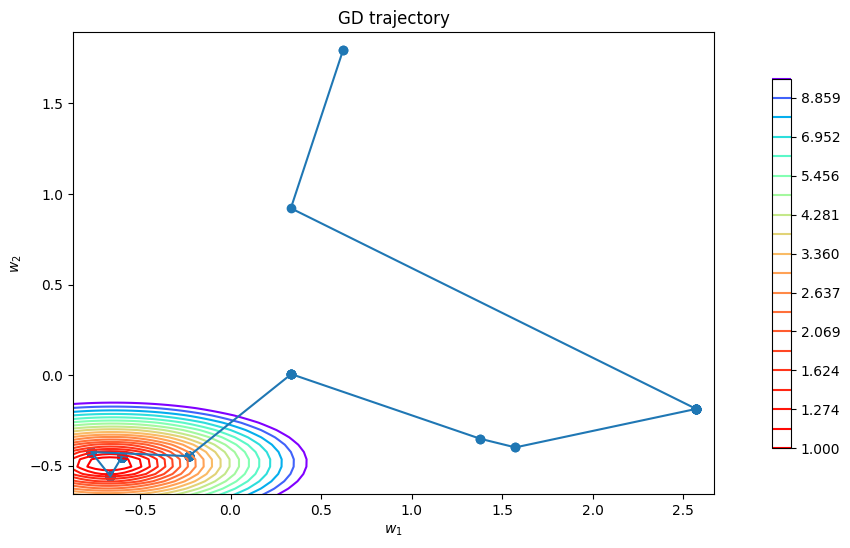

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))


loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)

trace0 = gradient_descent(w_init, X, y, loss, lr, 100)
mse0 = print(loss.calc_loss(X, y, trace0[-1]))
trace1, mse1 = simulated_annealing(X, y, w_init, T=1.0, T_min=0.00001, alpha=0.9, max_iter=1000)

print(f'MSE = {mse0}')
plot_gd(trace0, X, y, loss)
print(f'MSE = {mse1}')
plot_gd(trace1, X, y, loss)